In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.feature_selection import RFECV

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.correlation import plot_corr

#import pandas_profiling
%matplotlib inline

### Read data

In [30]:
data_raw=pd.read_csv('train_data.csv')
data1=data_raw.copy()

testdata_raw=pd.read_csv('test_data.csv')
data_test=testdata_raw.copy()

In [4]:
data1.head()

,Unnamed: 0,Registration_Number,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,English,Logical,Quant,...,12board,CollegeID,CollegeTier,Deg,Branch,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GradYear
0,0,201201001,0.9737,0.8128,0.5269,1.35490,-0.4455,515,585,525,...,"board of intermediate education,ap",3223,2.0,B.Tech/B.E.,computer engineering,78.00,3223,0,Andhra Pradesh,2011.0
1,1,201201002,-0.7335,0.3789,1.2396,-0.10760,0.8637,695,610,780,...,cbse,6058,2.0,B.Tech/B.E.,electronics and communication engineering,70.06,6058,0,Madhya Pradesh,2012.0
2,2,201201003,0.2718,1.7109,0.1637,-0.86820,0.6721,615,545,370,...,cbse,1620,2.0,B.Tech/B.E.,information technology,70.00,1620,0,Uttar Pradesh,2014.0
3,3,201201004,0.0464,0.3448,-0.3440,-0.40780,-0.9194,635,585,625,...,cbse,6569,1.0,B.Tech/B.E.,computer engineering,74.64,6569,1,Delhi,2011.0
4,4,201201005,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,545,625,465,...,cbse,8760,NaN,B.Tech/B.E.,electronics and communication engineering,73.90,8760,0,Uttar Pradesh,NaN


In [240]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3498 non-null   int64  
 1   Registration_Number    3498 non-null   int64  
 2   conscientiousness      3498 non-null   float64
 3   agreeableness          3498 non-null   float64
 4   extraversion           3498 non-null   float64
 5   nueroticism            3498 non-null   float64
 6   openess_to_experience  3498 non-null   float64
 7   English                3498 non-null   int64  
 8   Logical                3498 non-null   int64  
 9   Quant                  3498 non-null   int64  
 10  Domain                 3498 non-null   float64
 11  ComputerProgramming    3498 non-null   int64  
 12  ElectronicsAndSemicon  3498 non-null   int64  
 13  ComputerScience        3498 non-null   int64  
 14  MechanicalEngg         3498 non-null   int64  
 15  Elec

In [241]:
print("Train :\nno. of rows: ",data1.shape[0], "\n""no. of columns: ",data1.shape[1])
print("Test :\nno. of rows: ",data_test.shape[0], "\n""no. of columns: ",data_test.shape[1])

Train :
no. of rows:  3498 
no. of columns:  39
Test :
no. of rows:  500 
no. of columns:  38


In [31]:
data1.rename(columns={'Unnamed: 0':'ind'},inplace=True)
data1.drop('ind',axis=1,inplace=True)
data1.Joining_date=pd.to_datetime(data1.Joining_date)
data1.DOB=pd.to_datetime(data1.DOB)
#data1.CollegeCityID=pd.Categorical(data1.CollegeCityID)
#data1.CollegeCityTier=pd.Categorical(data1.CollegeCityTier)
#data1.CollegeTier=pd.Categorical(data1.CollegeTier)
#data1.CollegeID=pd.Categorical(data1.CollegeID)
data1['Leaving_date']=data1['Leaving_date'].replace('present','31-12-2020 00:00')
data1['Leaving_date']=pd.to_datetime(data1.Leaving_date)


data_test.rename(columns={'Unnamed: 0':'ind'},inplace=True)
data_test.drop('ind',axis=1,inplace=True)
data_test.Joining_date=pd.to_datetime(data_test.Joining_date)
data_test.DOB=pd.to_datetime(data_test.DOB)
#data_test.CollegeCityID=pd.Categorical(data_test.CollegeCityID)
#data_test.CollegeCityTier=pd.Categorical(data_test.CollegeCityTier)
#data_test.CollegeTier=pd.Categorical(data_test.CollegeTier)
#data_test.CollegeID=pd.Categorical(data_test.CollegeID)

data1.drop(['Joining_date','Leaving_date','Role','JobCity'],axis=1,inplace=True)
data_test.drop(['Joining_date','Leaving_date','Role','JobCity'],axis=1,inplace=True)

#### Separate categorical and cont variables

In [32]:
cat=[]
cont=[]
for i in data1.columns:
    if (data1[i].dtype=="float")|(data1[i].dtype=="int64"):
        cont.append(i)
    elif(data1[i].dtype=="object"):
        cat.append(i)
print("Categorical Variables",cat) 
print("\nCont Variables",cont)


Categorical Variables ['Role', 'JobCity', 'Gender', '10board', '12board', 'Deg', 'Branch', 'CollegeState']

Cont Variables ['Registration_Number', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'CTC', '10percentage', '12graduation', '12percentage', 'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'GradYear']


In [131]:
data1[cat].describe()

,Role,JobCity,Gender,10board,12board,Deg,Branch,CollegeState
count,3498,3498,3498,3498,3498,3498,3498,3498
unique,398,302,2,255,312,4,46,26
top,software engineer,Bangalore,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh
freq,461,553,2663,1227,1234,3240,777,808


### Unique values in categorical variables

In [244]:
for column in data1.columns:
    if data1[column].dtype == 'object':
        print(column.upper(),': ',data1[column].nunique())
        print(data1[column].value_counts().sort_values())
        print('\n')

ROLE :  398
system analyst                         1
information technology specialist      1
business consultant                    1
rf/dt engineer                         1
executive engg                         1
                                    ... 
systems engineer                     109
programmer analyst                   134
system engineer                      179
software developer                   228
software engineer                    461
Name: Role, Length: 398, dtype: int64


JOBCITY :  302
PATNA          1
Tirupati       1
pondy          1
Nanded         1
gurgoan        1
            ... 
Pune         262
Hyderabad    295
Noida        324
-1           396
Bangalore    553
Name: JobCity, Length: 302, dtype: int64


GENDER :  2
f     835
m    2663
Name: Gender, dtype: int64


10BOARD :  255
tamilnadu matriculation board               1
uttaranchal state board                     1
board of school education uttarakhand       1
cgbse raipur                          

In [33]:
data1.Deg=data1.Deg.replace('M.Sc. (Tech.)','MCA')

In [34]:
data1.loc[data1['Branch'].str.contains('computer'), 'Branch'] = 'ComputerScience'
data1.loc[data1['Branch'].str.contains('electronics'), 'Branch'] = 'ElectronicsAndSemicon'
data1.loc[data1['Branch'].str.contains('information'), 'Branch'] = 'ComputerScience'
data1.loc[data1['Branch'].str.contains('mech'), 'Branch'] = 'MechanicalEngg'
data1.loc[data1['Branch'].str.contains('electrical'), 'Branch'] = 'ElectricalEngg'
data1.loc[data1['Branch'].str.contains('embedded'), 'Branch'] = 'ElectronicsAndSemicon'
data1.loc[data1['Branch'].str.contains('civil'), 'Branch'] = 'Other'
dept=data1.Branch.value_counts()<20
data1.Branch=data1['Branch'].apply(lambda x: 'Other' if dept.loc[x]==True else x)

In [35]:
data1.loc[data1['10board'].str.contains('state'), '10board'] = 'State Board'
data1.loc[data1['10board'].str.contains('secondary'), '10board'] = 'State Board'
data1.loc[data1['10board'].str.contains('matric'), '10board'] = 'Matric'
data1.loc[data1['10board'].str.contains('cbse'), '10board'] = 'CBSE'
data1.loc[data1['10board'].str.contains('icse'), '10board'] = 'ICSE'
data1.loc[data1['10board'].str.contains('board'), '10board'] = 'State Board'
data1.loc[data1['10board'].str.contains('bse'), '10board'] = 'State Board'
data1.loc[data1['10board'].str.contains('up'), '10board'] = 'State Board'
data1.loc[data1['10board'].str.contains('sslc'), '10board'] = 'State Board'
data1.loc[data1['10board'].str.contains('ssc'), '10board'] = 'State Board'
data1.loc[data1['10board'].str.contains('aisse'), '10board'] = 'CBSE'
data1.loc[data1['10board'].str.contains('tric'), '10board'] = 'Matric'
data1.loc[data1['10board'].str.contains('cbsc'), '10board'] = 'CBSE'
data1.loc[data1['10board'].str.contains('indian school certificate examination'), '10board'] = 'ICSE' 
data1.loc[data1['10board'].str.contains('dav'), '10board'] = 'CBSE' 
data1.loc[data1['10board'].str.contains('maticulation'), '10board'] = 'Matric'
data1.loc[data1['10board'].str.contains('national public school'), '10board'] = 'CBSE'
data1.loc[data1['10board'].str.contains('anglo indian'), '10board'] = 'ICSE' 
data1['10board']=data1['10board'].replace('0','CBSE')

board_10th=data1['10board'].value_counts()<20
data1['10board']=data1['10board'].apply(lambda x: 'State Board' if board_10th.loc[x]==True else x)

In [36]:
data1.loc[data1['10board'].str.contains('Matric'), '10board'] = 'State Board'

In [37]:
data1['12board']=data1['12board'].replace('0','CBSE')
data1['12board']=data1['12board'].replace('cbse','CBSE')
data1['12board']=data1['12board'].replace('icse','isc')

data1['12board']=data1['12board'].replace('central board of secondary education','CBSE')
data1['12board']=data1['12board'].replace('ssc','CBSE')
data1['12board']=data1['12board'].replace(['aissce','all india board'],'CBSE')
data1['12board']=data1['12board'].replace(['cbse,new delhi','cbsc'],'CBSE')
data1.loc[data1['12board'].str.contains('isc'), '12board'] = 'ISC' 
data1.loc[data1['12board'].str.contains('public'), '12board'] = 'CBSE' 
board_12th=data1['12board'].value_counts()<100
data1['12board']=data1['12board'].apply(lambda x: 'State Board' if board_12th.loc[x]==True else x)
data1['12board']=data1['12board'].replace('state board','State Board')

In [38]:
data1['CollegeState']=data1['CollegeState'].replace('Union Territory','Tamil Nadu')
Cl_State=data1['CollegeState'].value_counts()<50
data1['CollegeState']=data1['CollegeState'].apply(lambda x: 'Other State' if Cl_State.loc[x]==True else x)

In [39]:
data_test.Deg=data_test.Deg.replace('M.Sc. (Tech.)','MCA')

In [40]:
data_test.loc[data_test['Branch'].str.contains('computer'), 'Branch'] = 'ComputerScience'
data_test.loc[data_test['Branch'].str.contains('electronics'), 'Branch'] = 'ElectronicsAndSemicon'
data_test.loc[data_test['Branch'].str.contains('information'), 'Branch'] = 'ComputerScience'
data_test.loc[data_test['Branch'].str.contains('mech'), 'Branch'] = 'MechanicalEngg'
data_test.loc[data_test['Branch'].str.contains('electrical'), 'Branch'] = 'ElectricalEngg'
data_test.loc[data_test['Branch'].str.contains('embedded'), 'Branch'] = 'ElectronicsAndSemicon'
data_test.loc[data_test['Branch'].str.contains('civil'), 'Branch'] = 'Other'
dept=data_test.Branch.value_counts()<20
data_test.Branch=data_test['Branch'].apply(lambda x: 'Other' if dept.loc[x]==True else x)

In [41]:
data_test.loc[data_test['10board'].str.contains('state'), '10board'] = 'State Board'
data_test.loc[data_test['10board'].str.contains('secondary'), '10board'] = 'State Board'
data_test.loc[data_test['10board'].str.contains('matric'), '10board'] = 'Matric'
data_test.loc[data_test['10board'].str.contains('cbse'), '10board'] = 'CBSE'
data_test.loc[data_test['10board'].str.contains('icse'), '10board'] = 'ICSE'
data_test.loc[data_test['10board'].str.contains('board'), '10board'] = 'State Board'
data_test.loc[data_test['10board'].str.contains('bse'), '10board'] = 'State Board'
data_test.loc[data_test['10board'].str.contains('up'), '10board'] = 'State Board'
data_test.loc[data_test['10board'].str.contains('sslc'), '10board'] = 'State Board'
data_test.loc[data_test['10board'].str.contains('ssc'), '10board'] = 'State Board'
data_test.loc[data_test['10board'].str.contains('aisse'), '10board'] = 'CBSE'
data_test.loc[data_test['10board'].str.contains('tric'), '10board'] = 'Matric'
data_test.loc[data_test['10board'].str.contains('cbsc'), '10board'] = 'CBSE'
data_test.loc[data_test['10board'].str.contains('indian school certificate examination'), '10board'] = 'ICSE' 
data_test.loc[data_test['10board'].str.contains('dav'), '10board'] = 'CBSE' 
data_test.loc[data_test['10board'].str.contains('maticulation'), '10board'] = 'Matric'
data_test.loc[data_test['10board'].str.contains('national public school'), '10board'] = 'CBSE'
data_test.loc[data_test['10board'].str.contains('anglo indian'), '10board'] = 'ICSE' 
data_test['10board']=data_test['10board'].replace('0','CBSE')

board_10th=data_test['10board'].value_counts()<4
data_test['10board']=data_test['10board'].apply(lambda x: 'State Board' if board_10th.loc[x]==True else x)

In [42]:
data_test.loc[data_test['10board'].str.contains('Matric'), '10board'] = 'State Board'

In [43]:
data_test['12board']=data_test['12board'].replace('0','CBSE')
data_test['12board']=data_test['12board'].replace('cbse','CBSE')
data_test['12board']=data_test['12board'].replace('icse','isc')

data_test['12board']=data_test['12board'].replace('central board of secondary education','CBSE')
data_test['12board']=data_test['12board'].replace('ssc','CBSE')
data_test['12board']=data_test['12board'].replace(['aissce','all india board'],'CBSE')
data_test['12board']=data_test['12board'].replace(['cbse,new delhi','cbsc'],'CBSE')
data_test.loc[data_test['12board'].str.contains('isc'), '12board'] = 'ISC' 
data_test.loc[data_test['12board'].str.contains('public'), '12board'] = 'CBSE' 

data_test['12board']=data_test['12board'].replace('state board','State Board')

board_12th=data_test['12board'].value_counts()<15
data_test['12board']=data_test['12board'].apply(lambda x: 'State Board' if board_12th.loc[x]==True else x)

In [44]:
data_test['CollegeState']=data_test['CollegeState'].replace('Union Territory','Tamil Nadu')
Cl_State=data_test['CollegeState'].value_counts()<10
data_test['CollegeState']=data_test['CollegeState'].apply(lambda x: 'Other State' if Cl_State.loc[x]==True else x)


In [19]:
for column in data1.columns:
    if data1[column].dtype == 'object':
        print(column.upper(),': ',data1[column].nunique())
        print(data1[column].value_counts().sort_values())
        print('\n')

ROLE :  398
technology lead             1
senior research fellow      1
junior manager              1
operations engineer         1
sales trainer               1
                         ... 
systems engineer          109
programmer analyst        134
system engineer           179
software developer        228
software engineer         461
Name: Role, Length: 398, dtype: int64


JOBCITY :  302
Vizag          1
thane          1
bihar          1
Bikaner        1
Jowai          1
            ... 
Pune         262
Hyderabad    295
Noida        324
-1           396
Bangalore    553
Name: JobCity, Length: 302, dtype: int64


GENDER :  2
f     835
m    2663
Name: Gender, dtype: int64


10BOARD :  3
ICSE            262
CBSE           1535
State Board    1701
Name: 10board, dtype: int64


12BOARD :  3
ISC             160
CBSE           1567
State Board    1771
Name: 12board, dtype: int64


DEG :  3
M.Tech./M.E.      45
MCA              213
B.Tech/B.E.     3240
Name: Deg, dtype: int64


BRANCH :

In [45]:
for column in data_test.columns:
    if data_test[column].dtype == 'object':
        print(column.upper(),': ',data_test[column].nunique())
        print(data_test[column].value_counts().sort_values())
        print('\n')

GENDER :  2
f    122
m    378
Name: Gender, dtype: int64


10BOARD :  3
ICSE            26
CBSE           219
State Board    255
Name: 10board, dtype: int64


12BOARD :  3
ISC             17
CBSE           218
State Board    265
Name: 12board, dtype: int64


DEG :  3
M.Tech./M.E.      8
MCA              32
B.Tech/B.E.     460
Name: Deg, dtype: int64


BRANCH :  4
MechanicalEngg            24
Other                     27
ElectronicsAndSemicon    151
ComputerScience          298
Name: Branch, dtype: int64


COLLEGESTATE :  15
Other State        15
Delhi              18
Uttarakhand        21
Andhra Pradesh     22
Rajasthan          22
Madhya Pradesh     23
Punjab             23
West Bengal        23
Orissa             25
Haryana            33
Maharashtra        34
Tamil Nadu         39
Telangana          41
Karnataka          54
Uttar Pradesh     107
Name: CollegeState, dtype: int64




### Imputing missing values

In [46]:
data1.GradYear.fillna(0,inplace=True)
year=[]
for ind,row in data1.iterrows():
    data_grad_year=row.GradYear
    if data_grad_year==0:
        if row.Deg=='B.Tech/B.E.':
            temp=row['12graduation']+4
            year.append(temp)
            
        elif row.Deg=='MCA':
            temp=row['12graduation']+6
            year.append(temp)
        elif row.Deg=='M.Tech./M.E.':  
            temp=row['12graduation']+6
            year.append(temp)
            
    else:
        year.append(data_grad_year)
data1['GradYear']=year

In [47]:
data1.CollegeTier.fillna(2.0,inplace=True)

In [48]:
data1[~data1['10percentage'].isnull()].groupby(['10board','Gender'])['10percentage'].median()

10board      Gender
CBSE         f         82.000
             m         79.000
ICSE         f         79.140
             m         78.585
State Board  f         83.330
             m         77.000
Name: 10percentage, dtype: float64

In [49]:
data1['10percentage']=data1.groupby(['10board','Gender'])['10percentage'].transform(lambda x: x.fillna(x.median()))
data1['12percentage']=data1.groupby(['12board','Gender'])['12percentage'].transform(lambda x: x.fillna(x.mean()))

In [50]:
data1.GradYear=data1.GradYear.astype('int')
data_test.GradYear=data_test.GradYear.astype('int')

data1['12graduation']=data1['12graduation'].astype('int')
data_test['12graduation']=data_test['12graduation'].astype('int')

In [51]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Registration_Number    3498 non-null   int64         
 1   conscientiousness      3498 non-null   float64       
 2   agreeableness          3498 non-null   float64       
 3   extraversion           3498 non-null   float64       
 4   nueroticism            3498 non-null   float64       
 5   openess_to_experience  3498 non-null   float64       
 6   English                3498 non-null   int64         
 7   Logical                3498 non-null   int64         
 8   Quant                  3498 non-null   int64         
 9   Domain                 3498 non-null   float64       
 10  ComputerProgramming    3498 non-null   int64         
 11  ElectronicsAndSemicon  3498 non-null   int64         
 12  ComputerScience        3498 non-null   int64         
 13  Mec

In [52]:
upd_gpa=[]
for gpa in data1.collegeGPA:
    if gpa<=10:
        temp=gpa*10
        upd_gpa.append(temp)
    else:
        upd_gpa.append(gpa)
data1.collegeGPA=upd_gpa    

In [53]:
upd_gpa=[]
for gpa in data_test.collegeGPA:
    if gpa<=10:
        temp=gpa*10
        upd_gpa.append(temp)
    else:
        upd_gpa.append(gpa)
data_test.collegeGPA=upd_gpa    

In [54]:
data1['Age']=2015-data1['DOB'].dt.year

data_test['Age']=2015-data_test['DOB'].dt.year


data1['Work_Exp']=2015-data1.GradYear
data_test['Work_Exp']=2015-data_test.GradYear

yoj=data1.Joining_date.dt.year

## Univariate analysis

In [ ]:
ElectronicsAndSemicon     499.0  -> 300 - 35
ComputerScience          1282.0  -> 376 =40%  , 253 -3%
MechanicalEngg            211.  ->15%


In [71]:
upd_domain=[]
for ind,row in data1.iterrows():
    if row.Domain==-1:
        score=row.ComputerProgramming
        if score!=-1:
            if score<200:
                temp=0.01
            elif score<300:
                temp=0.02
            elif score<330:
                temp=0.1
            elif score<350:
                temp=0.15
            elif score<375:
                temp=0.19
            elif score<385:
                temp=0.25
            elif score<405:
                temp=0.28
            elif score<415:
                temp=0.33
            elif score<425:
                temp=0.38
            elif score<444:
                temp=0.43
            elif score<455:
                temp=0.48
            elif score<465:
                temp=0.53
            elif score<475:
                temp=0.58
            elif score<485:
                temp=0.63
            elif score<495:
                temp=0.68
            elif score<515:
                temp=0.73
            elif score<525:
                temp=0.79
            elif score<554:
                temp=0.83
            elif score<575:
                temp=0.88
            elif score<615:
                temp=0.93
            elif score<630:
                temp=0.96
            elif score<650:
                temp=0.97
            elif score<685:
                temp=0.98
            else:
                temp=0.99
            upd_domain.append(temp)
        elif row.ComputerScience!=-1:
            if row.ComputerScience<=253:
                temp=0.03
            elif row.ComputerScience<=376:
                temp=0.4
            upd_domain.append(temp)
        elif row.ElectronicsAndSemicon!=-1:
            if row.ElectronicsAndSemicon<=300:
                temp=0.35
            if row.ElectronicsAndSemicon<=260:
                temp=0.14
            upd_domain.append(temp)
        elif row.MechanicalEngg!=-1:
            if row.MechanicalEngg<=313:
                temp=0.15
            upd_domain.append(temp)
        else:
            upd_domain.append(-1)
    else:
        upd_domain.append(row.Domain)
data1['updated_domain']=upd_domain          
                

In [72]:
upd_domain=[]
for ind,row in data_test.iterrows():
    if row.Domain==-1:
        score=row.ComputerProgramming
        if score!=-1:
            if score<200:
                temp=0.01
            elif score<300:
                temp=0.02
            elif score<330:
                temp=0.1
            elif score<350:
                temp=0.15
            elif score<375:
                temp=0.19
            elif score<385:
                temp=0.25
            elif score<405:
                temp=0.28
            elif score<415:
                temp=0.33
            elif score<425:
                temp=0.38
            elif score<444:
                temp=0.43
            elif score<455:
                temp=0.48
            elif score<465:
                temp=0.53
            elif score<475:
                temp=0.58
            elif score<485:
                temp=0.63
            elif score<495:
                temp=0.68
            elif score<515:
                temp=0.73
            elif score<525:
                temp=0.79
            elif score<554:
                temp=0.83
            elif score<575:
                temp=0.88
            elif score<615:
                temp=0.93
            elif score<630:
                temp=0.96
            elif score<650:
                temp=0.97
            elif score<685:
                temp=0.98
            else:
                temp=0.99
            upd_domain.append(temp)
        elif row.ComputerScience!=-1:
            if row.ComputerScience<=253:
                temp=0.03
            elif row.ComputerScience<=376:
                temp=0.4
            upd_domain.append(temp)
        elif row.ElectronicsAndSemicon!=-1:
            if row.ElectronicsAndSemicon<=300:
                temp=0.35
            if row.ElectronicsAndSemicon<=260:
                temp=0.14
            upd_domain.append(temp)
        elif row.MechanicalEngg!=-1:
            if row.MechanicalEngg<=313:
                temp=0.15
            upd_domain.append(temp)
        else:
            upd_domain.append(-1)
    else:
        upd_domain.append(row.Domain)
data_test['updated_domain']=upd_domain          
                

In [181]:
np.percentile(data1[data1['ComputerProgramming']!=-1].ComputerProgramming,99)

684.8000000000002

In [182]:
for i in np.arange(0,101,5):
    print(i,np.percentile(data1[data1['ComputerProgramming']!=-1].ComputerProgramming,i))

0 105.0
5 305.0
10 334.0
15 355.0
20 375.0
25 385.0
30 395.0
35 415.0
40 425.0
45 435.0
50 445.0
55 465.0
60 475.0
65 485.0
70 495.0
75 515.0
80 525.0
85 554.6999999999998
90 575.0
95 615.0
100 840.0


In [506]:
data1.columns

Index(['Registration_Number', 'conscientiousness', 'agreeableness',
       'extraversion', 'nueroticism', 'openess_to_experience', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'CTC', 'Joining_date',
       'Leaving_date', 'Role', 'JobCity', 'Gender', '10percentage', '10board',
       '12graduation', '12percentage', '12board', 'CollegeID', 'CollegeTier',
       'Deg', 'Branch', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GradYear', 'Age', 'updated_domain', 'Work_Exp'],
      dtype='object')

In [276]:
data1_eda_cont=['conscientiousness', 'agreeableness','extraversion', 'nueroticism', 'openess_to_experience', 'English',
       'Logical', 'Quant', '10percentage','12graduation', '12percentage','collegeGPA', 'GradYear', 'Age', 'updated_domain', 'CTC']

In [277]:
data1_x_eda_cat=['Role', 'JobCity', 'Gender','10board',
       '12board', 'CollegeID', 'CollegeTier',
       'Deg', 'Branch','CollegeCityID', 'CollegeCityTier', 'CollegeState']

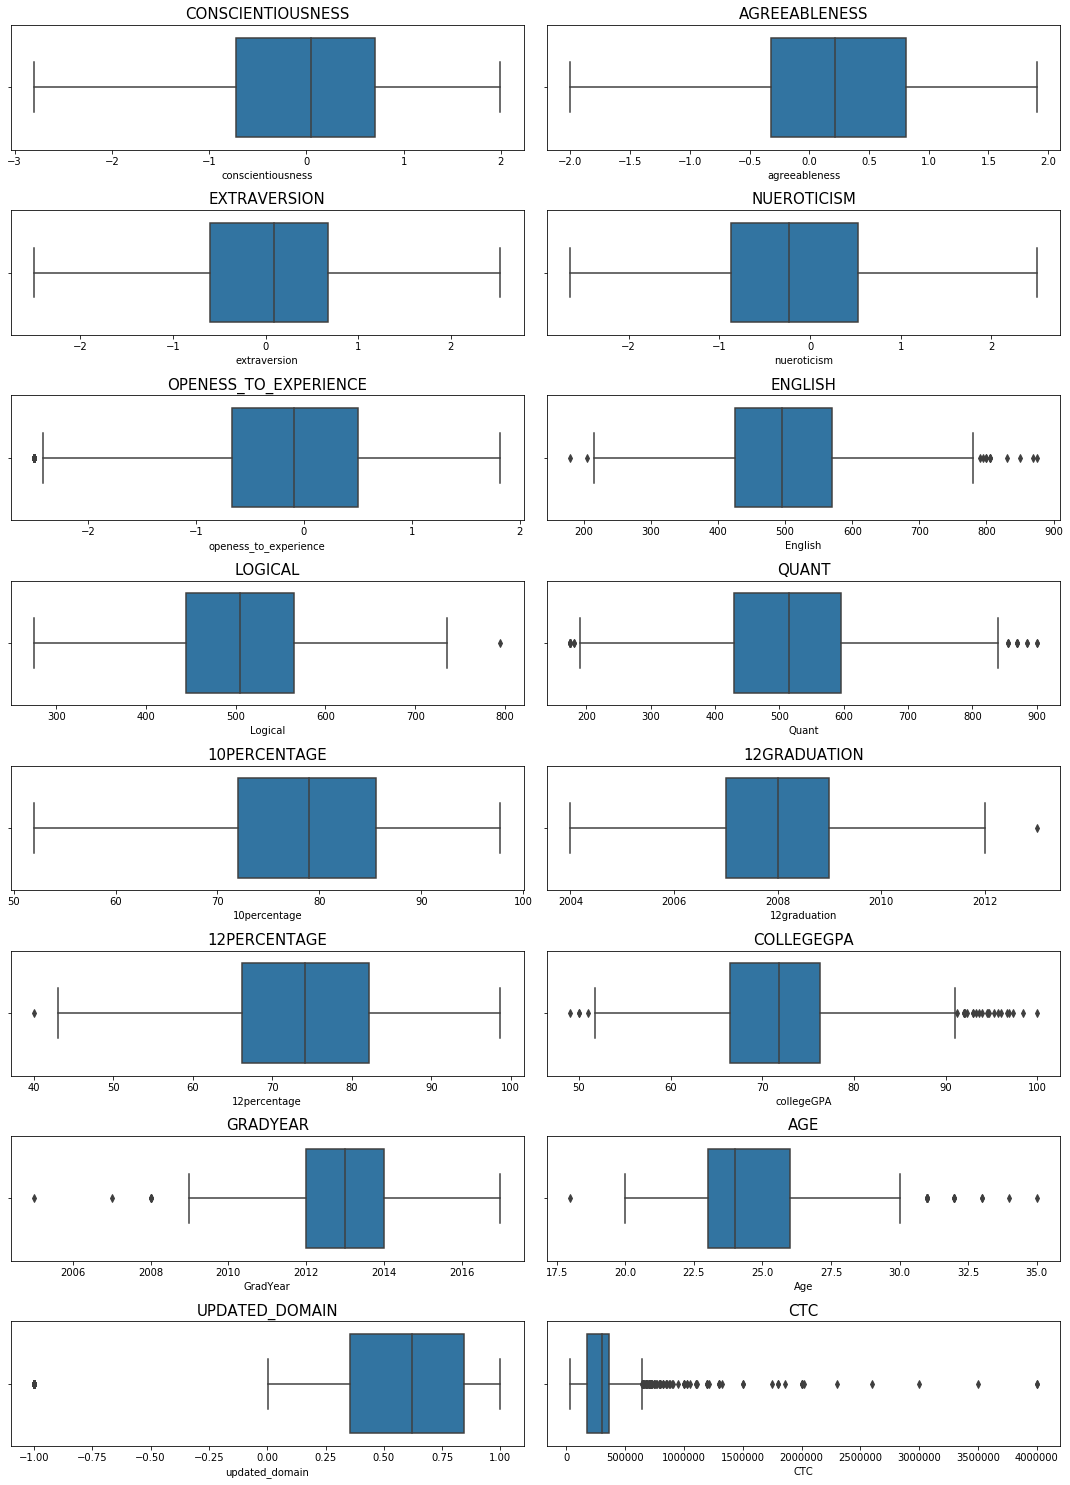

In [291]:
data_plot=data1[data1_eda_cont]
fig=plt.figure(figsize=(15,28))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(11,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i].upper(),fontsize=15)
plt.tight_layout()
plt.show()


In [288]:
data1[data1['12graduation']<2003][['GradYear','CTC','12graduation']].sort_index()

,GradYear,CTC,12graduation
59,2011,120000,1995
890,2010,310000,2002
1083,2011,400000,2001
1169,2011,105000,2002
1420,2009,200000,2002
1502,2011,200000,2002
1528,2010,110000,1998
1883,2010,100000,2001
2409,2009,680000,2002
2606,2009,300000,2002


In [285]:
(data1.GradYear-data1['12graduation']).value_counts()

4     2125
5      687
6      276
7       96
3       77
8       38
9       15
2        8
10       6
1        5
11       2
16       1
12       1
0        1
dtype: int64

In [120]:
data1[data1.GradYear==data1['12graduation']]

,Registration_Number,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,English,Logical,Quant,Domain,...,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GradYear,10board,10percentage,12percentage,Age,updated_domain
0,201201001,0.9737,0.8128,0.5269,1.35490,-0.4455,515,585,525,0.635979,...,78.00,3223,0,Andhra Pradesh,2007,State Board,84.30,95.80,25,0.635979
1,201201002,-0.7335,0.3789,1.2396,-0.10760,0.8637,695,610,780,0.960603,...,70.06,6058,0,Madhya Pradesh,2007,CBSE,85.40,85.00,26,0.960603
2,201201003,0.2718,1.7109,0.1637,-0.86820,0.6721,615,545,370,0.450877,...,70.00,1620,0,Uttar Pradesh,2010,CBSE,85.00,68.20,23,0.450877
3,201201004,0.0464,0.3448,-0.3440,-0.40780,-0.9194,635,585,625,0.974396,...,74.64,6569,1,Delhi,2007,CBSE,85.60,83.60,26,0.974396
4,201201005,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,545,625,465,0.124502,...,73.90,8760,0,Uttar Pradesh,2008,CBSE,79.00,76.80,24,0.124502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,201204494,0.1623,0.3448,0.6720,1.06110,0.8183,515,575,625,0.930371,...,83.53,6079,0,Orissa,2007,State Board,69.10,62.11,25,0.930371
3494,201204495,-1.0208,1.0449,-0.2974,-2.13600,-0.6692,475,565,705,-1.000000,...,74.31,10664,0,Andhra Pradesh,2010,State Board,91.00,96.30,22,0.630000
3495,201204496,-0.4173,0.6568,-0.7794,-0.05520,0.3444,515,465,615,0.414337,...,76.27,3384,1,Tamil Nadu,2007,State Board,80.83,86.80,25,0.414337
3496,201204497,0.2009,-0.1232,-0.7794,-0.05520,-0.4455,515,345,545,0.229482,...,74.50,1914,1,Karnataka,2007,CBSE,79.40,86.00,26,0.229482


#### Handling outliers

In [56]:
data_test['conscientiousness']=np.where(data_test['conscientiousness']<-2.8,-2.8,data_test['conscientiousness'])
data_test['agreeableness']=np.where(data_test['agreeableness']<-2,-2,data_test['agreeableness'])
data_test['extraversion']=np.where(data_test['extraversion']<-2.5,-2.5,data_test['extraversion'])
data_test['nueroticism']=np.where(data_test['nueroticism']>2.5,2.5,data_test['nueroticism'])
data_test['openess_to_experience']=np.where(data_test['openess_to_experience']<-2.5,-2.5,data_test['openess_to_experience'])
#data_test['English']=np.where(data_test['English']>800,800,data_test['English'])
data_test['Logical']=np.where(data_test['Logical']<275,275,data_test['Logical'])
data_test['Quant']=np.where(data_test['Quant']<175,175,data_test['Quant'])
#data_test['Quant']=np.where(data_test['Quant']>875,875,data_test['Quant'])
data_test['10percentage']=np.where(data_test['10percentage']<52,52,data_test['10percentage'])
data_test['12graduation']=np.where(data_test['12graduation']<2004,2004,data_test['12graduation'])
data_test['GradYear']=np.where(data_test['GradYear']<2004,2004,data_test['GradYear'])
data_test['Age']=np.where(data_test['Age']>35,35,data_test['Age'])
#data_test['Work_Exp']=np.where(data_test['Work_Exp']>11,11,data_test['Work_Exp'])

In [57]:
data1['conscientiousness']=np.where(data1['conscientiousness']<-2.8,-2.8,data1['conscientiousness'])
data1['agreeableness']=np.where(data1['agreeableness']<-2,-2,data1['agreeableness'])
data1['extraversion']=np.where(data1['extraversion']<-2.5,-2.5,data1['extraversion'])
data1['nueroticism']=np.where(data1['nueroticism']>2.5,2.5,data1['nueroticism'])
data1['openess_to_experience']=np.where(data1['openess_to_experience']<-2.5,-2.5,data1['openess_to_experience'])
#data1['English']=np.where(data1['English']>800,800,data1['English'])
data1['Logical']=np.where(data1['Logical']<275,275,data1['Logical'])
data1['Quant']=np.where(data1['Quant']<175,175,data1['Quant'])
#data1['Quant']=np.where(data1['Quant']>875,875,data1['Quant'])
data1['10percentage']=np.where(data1['10percentage']<52,52,data1['10percentage'])
data1['12graduation']=np.where(data1['12graduation']<2004,2004,data1['12graduation'])
data1['GradYear']=np.where(data1['GradYear']<2004,2004,data1['GradYear'])
data1['Age']=np.where(data1['Age']>35,35,data1['Age'])
#data1['Work_Exp']=np.where(data1['Work_Exp']>11,11,data1['Work_Exp'])

In [58]:
data1['Deg_label']=np.where(data1.Deg=='B.Tech/B.E.',2,data1.Deg)
data1['Deg_label']=np.where(data1.Deg=='MCA',1,data1.Deg_label)
data1['Deg_label']=np.where(data1.Deg=='M.Tech./M.E.',3,data1.Deg_label)

In [59]:
data1['Branch_label']=np.where(data1.Branch=='ComputerScience',5,data1.Branch)
data1['Branch_label']=np.where(data1.Branch=='ElectronicsAndSemicon',4,data1.Branch_label)
data1['Branch_label']=np.where(data1.Branch=='MechanicalEngg',3,data1.Branch_label)
data1['Branch_label']=np.where(data1.Branch=='ElectricalEngg',2,data1.Branch_label)
data1['Branch_label']=np.where(data1.Branch=='Other',1,data1.Branch_label)


In [60]:
data_test['Deg_label']=np.where(data_test.Deg=='B.Tech/B.E.',2,data_test.Deg)
data_test['Deg_label']=np.where(data_test.Deg=='MCA',1,data_test.Deg_label)
data_test['Deg_label']=np.where(data_test.Deg=='M.Tech./M.E.',3,data_test.Deg_label)

data_test['Branch_label']=np.where(data_test.Branch=='ComputerScience',5,data_test.Branch)
data_test['Branch_label']=np.where(data_test.Branch=='ElectronicsAndSemicon',4,data_test.Branch_label)
data_test['Branch_label']=np.where(data_test.Branch=='MechanicalEngg',3,data_test.Branch_label)
data_test['Branch_label']=np.where(data_test.Branch=='ElectricalEngg',2,data_test.Branch_label)
data_test['Branch_label']=np.where(data_test.Branch=='Other',1,data_test.Branch_label)


In [61]:
data1['Gender_label']=np.where(data1.Gender=='m',1,data1.Gender)
data1['Gender_label']=np.where(data1.Gender=='f',0,data1.Gender_label)

data_test['Gender_label']=np.where(data_test.Gender=='m',1,data_test.Gender)
data_test['Gender_label']=np.where(data_test.Gender=='f',0,data_test.Gender_label)

In [342]:
data_lowCTC=data1[data1.CTC<600000]

In [315]:
data_lowCTC_cont=['conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience',
 'English',
 'Logical',
 'Quant',
 '10percentage',
 '12graduation',
 '12percentage',
 'collegeGPA',
 'GradYear',
 'Age',
 'updated_domain',
 'CTC']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017710008A08>,
      dtype=object)

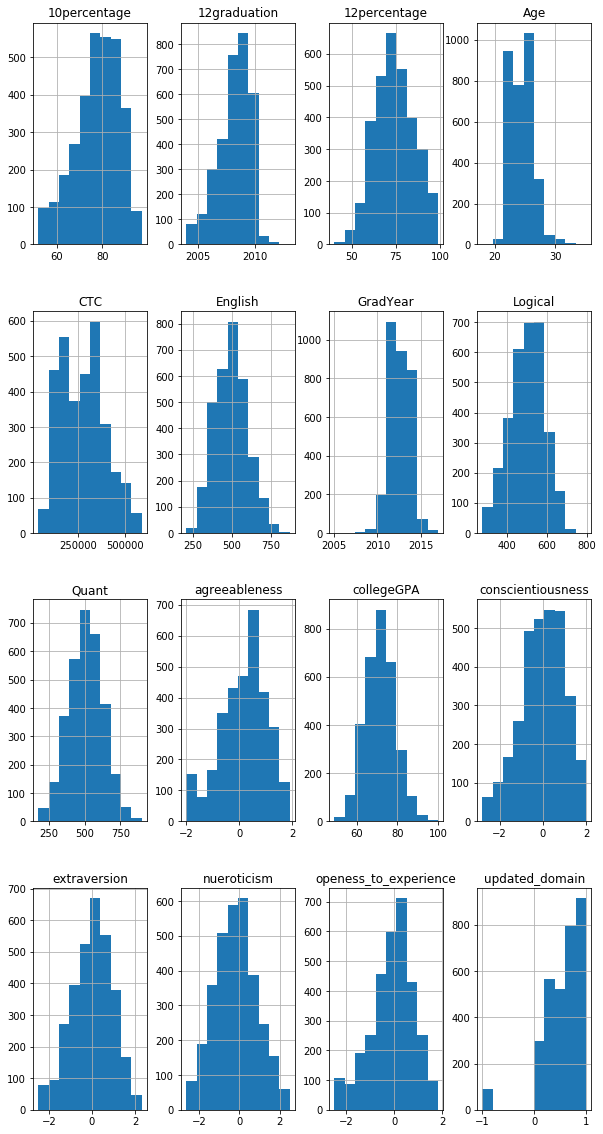

In [316]:
data_lowCTC[data_lowCTC_cont].hist(figsize=(10,20))

In [295]:
data1['sq_CTC']=np.sqrt(data1.CTC)

In [303]:
data1['cb_CTC']=np.cbrt(data1.CTC)

In [306]:
data1['qd_CTC']=np.sqrt(data1.sq_CTC)

In [309]:
data1['log2_CTC']=np.log2(data1.CTC)

In [312]:
data1['log_CTC']=np.log(data1.CTC)

In [301]:
data1_eda_cont

['conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience',
 'English',
 'Logical',
 'Quant',
 '10percentage',
 '12graduation',
 '12percentage',
 'collegeGPA',
 'GradYear',
 'Age',
 'updated_domain',
 'CTC',
 'sq_CTC']

In [313]:
data1_eda_cont=data1_eda_cont+['log_CTC']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001770F2CFFC8>,
      dtype=object)

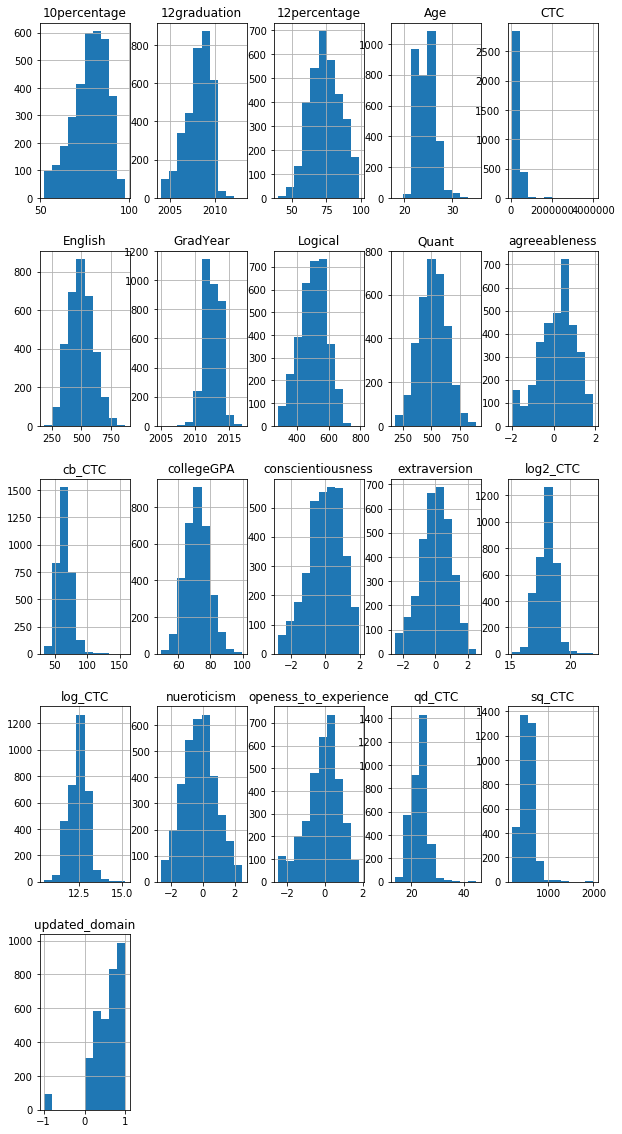

In [314]:
data1[data1_eda_cont].hist(figsize=(10,20))

In [629]:
data1_eda_cont

['conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience',
 'English',
 'Logical',
 'Quant',
 '10percentage',
 '12graduation',
 '12percentage',
 'collegeGPA',
 'CollegeCityID',
 'GradYear',
 'Age',
 'updated_domain',
 'Work_Exp',
 'CTC']

In [709]:
x_rf_model_dp15spl=['conscientiousness', 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience',
 'English',
 'Logical',
 'Quant',
 '10percentage',
 '12percentage',
 'collegeGPA',
 'GradYear',
 'updated_domain',
 'CTC']

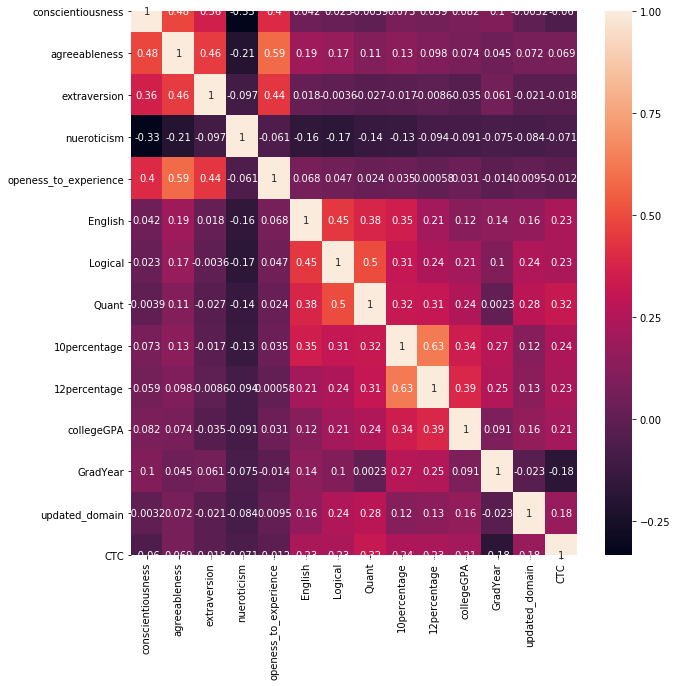

In [712]:
plt.figure(figsize=(10,10))
sns.heatmap(data1[x_rf_model_dp15spl].corr(),annot=True)

In [632]:
data1['log_CTC']=np.log(data1.CTC)

In [ ]:
data_lowCTC

In [ ]:
sns.pairplot(data_lowCTC[['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience','log_CTC']])

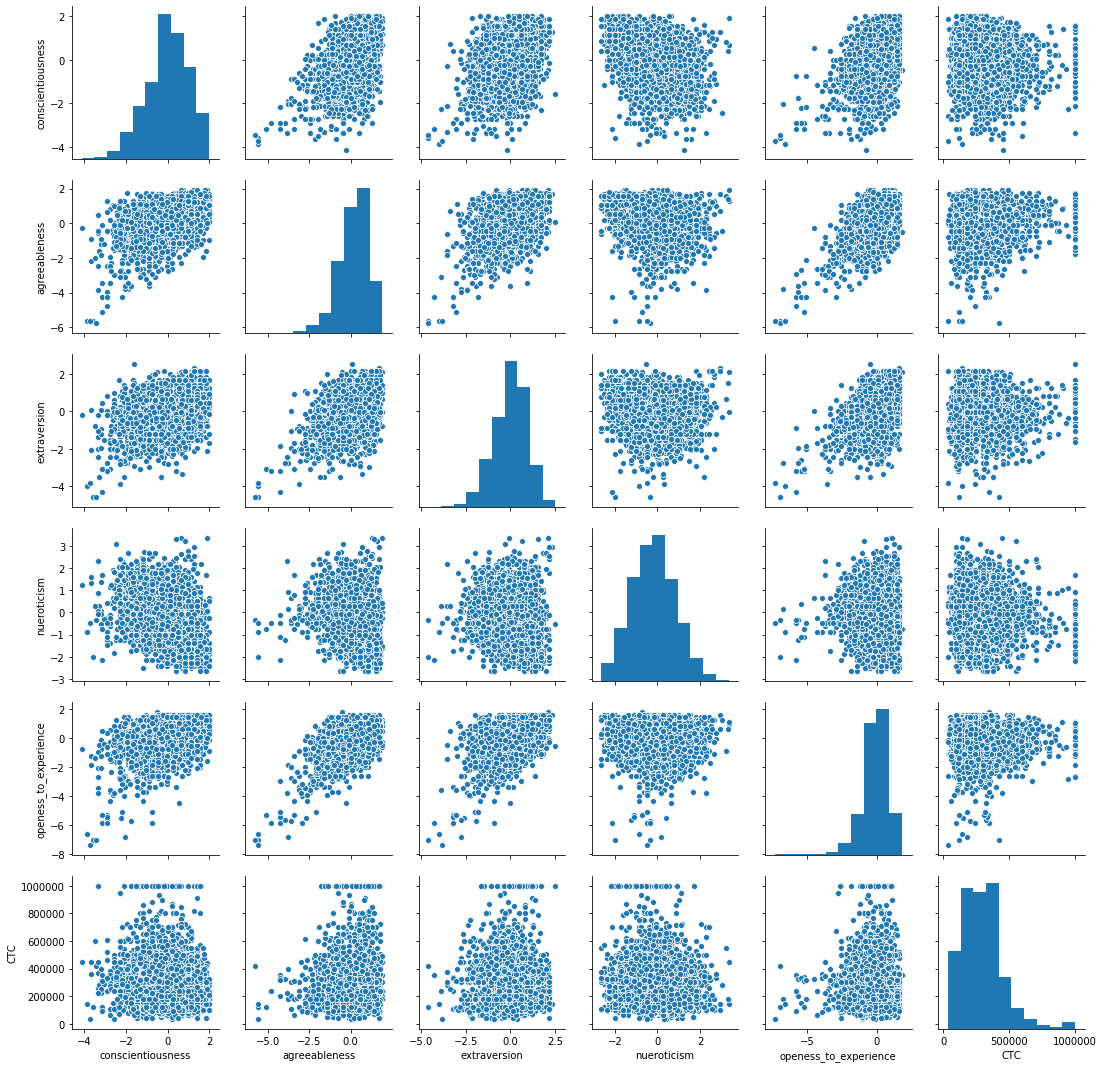

In [650]:
sns.pairplot(data1[['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience','CTC']])

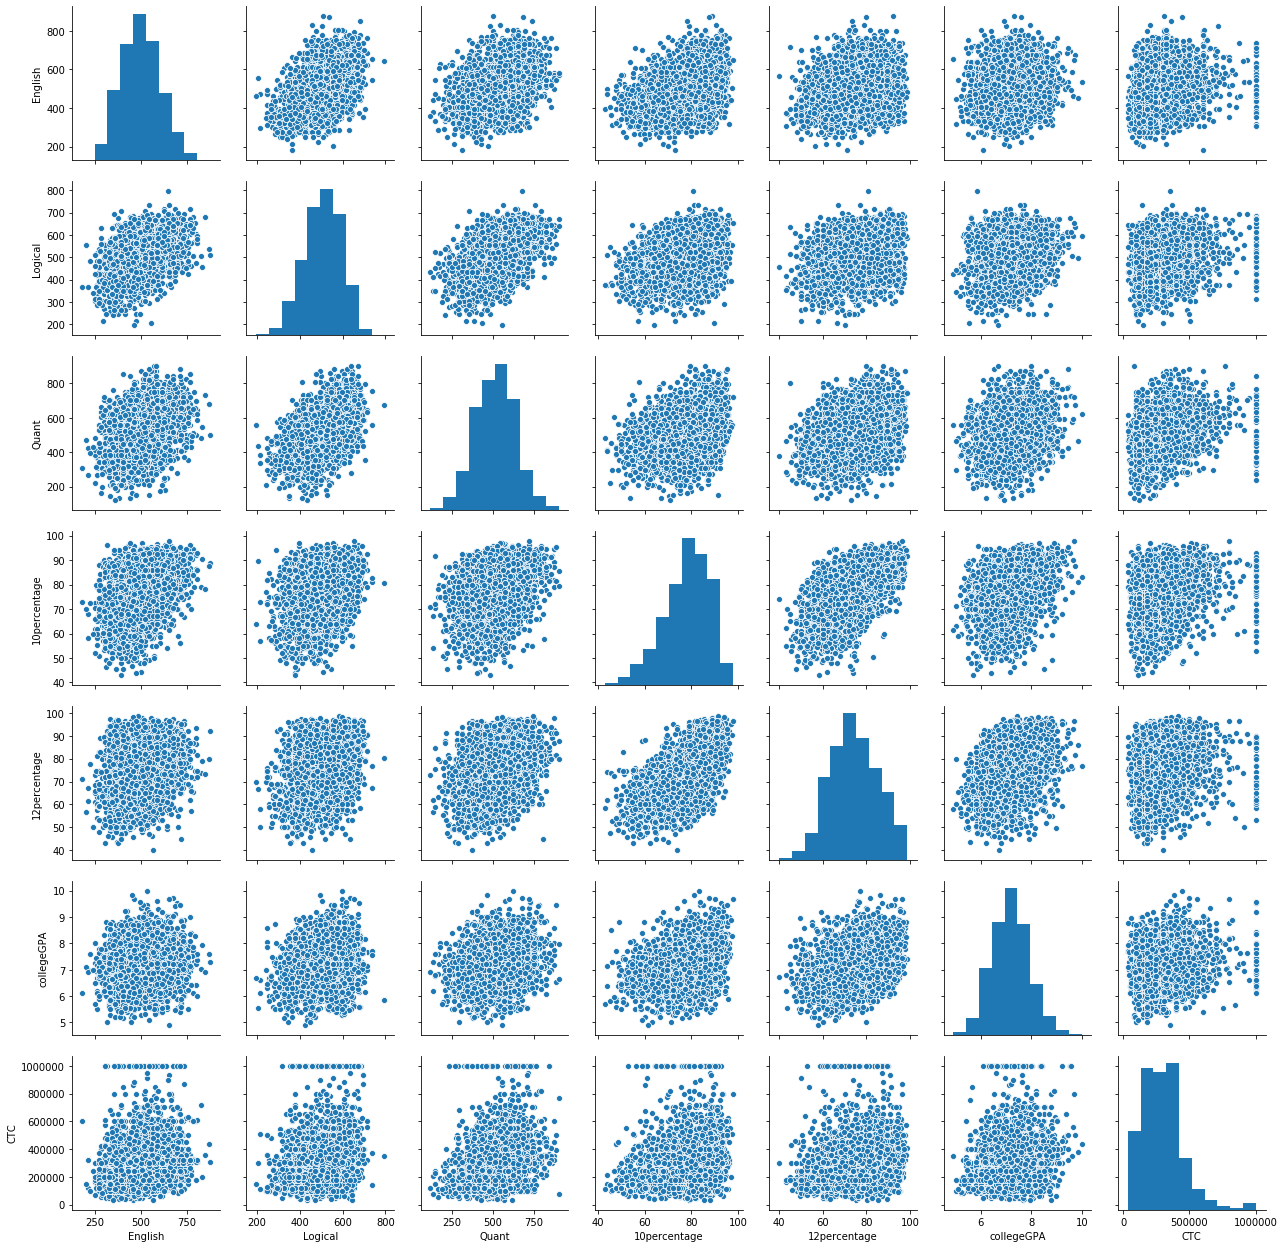

In [651]:
sns.pairplot(data1[['English', 'Logical', 'Quant', '10percentage', '12percentage', 'collegeGPA','CTC']])

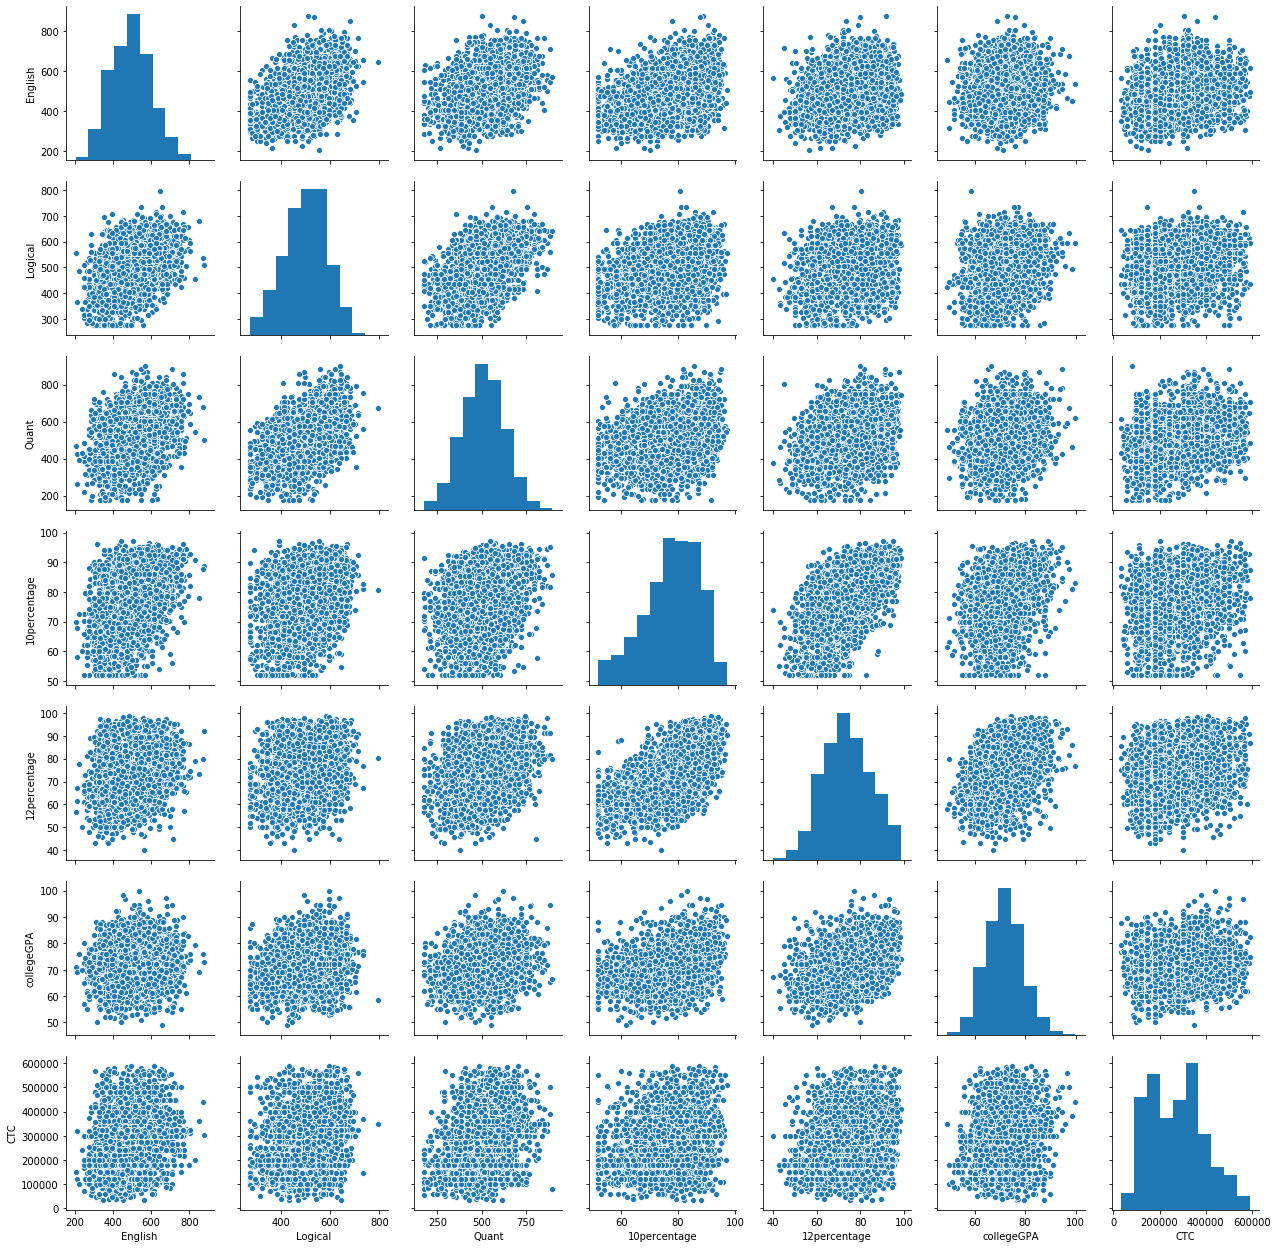

In [319]:

sns.pairplot(data_lowCTC[['English', 'Logical', 'Quant', '10percentage', '12percentage', 'collegeGPA','log_CTC']])

In [208]:
ohe_var=['Gender','12board','10board','Branch']

In [212]:
data1_dummy=pd.get_dummies(data1[ohe_var],drop_first=True)
data1_x_dummy=data1_dummy.columns.tolist()

In [215]:
data1.columns

Index(['Registration_Number', 'conscientiousness', 'agreeableness',
       'extraversion', 'nueroticism', 'openess_to_experience', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'CTC', 'Gender',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Deg', 'Branch', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GradYear'],
      dtype='object')

In [218]:
x=['conscientiousness', 'agreeableness',       'extraversion', 'nueroticism', 'openess_to_experience', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg','10percentage','12percentage','12graduation','CollegeID', 
   'CollegeTier','collegeGPA','CollegeCityID', 'CollegeCityTier','GradYear']

In [298]:
data1[['Domain', 'ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg']]

,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
0,0.635979,445,-1,-1,-1,-1,-1,-1
1,0.960603,-1,466,-1,-1,-1,-1,-1
2,0.450877,395,-1,-1,-1,-1,-1,-1
3,0.974396,615,-1,-1,-1,-1,-1,-1
4,0.124502,-1,233,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...
3493,0.930371,565,-1,-1,-1,-1,-1,-1
3494,-1.000000,475,-1,-1,-1,-1,-1,-1
3495,0.414337,-1,-1,-1,366,-1,-1,-1
3496,0.229482,355,266,-1,-1,-1,-1,-1


In [299]:
data1[['Domain', 'ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg']].max()

Domain                     0.99991
ComputerProgramming      840.00000
ElectronicsAndSemicon    612.00000
ComputerScience          715.00000
MechanicalEngg           616.00000
ElectricalEngg           676.00000
TelecomEngg              548.00000
CivilEngg                516.00000
dtype: float64

In [300]:
data1[['English','Logical', 'Quant']].max()

English    875
Logical    795
Quant      900
dtype: int64

In [220]:
X_train=data1[x].join(data1_dummy)

In [234]:
y_train=data1.CTC

In [236]:
y_log_train=np.log(data1.CTC)

In [251]:
test_dummy=pd.get_dummies(data_test[ohe_var],drop_first=True)
X_test=data_test[x].join(test_dummy)

In [252]:
X_test.head()

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,English,Logical,Quant,Domain,ComputerProgramming,...,GradYear,Gender_m,12board_ISC,12board_State Board,10board_ICSE,10board_Matric,10board_State Board,Branch_cs,Branch_ece/eee,Branch_mec
0,-0.3027,0.3789,-0.2974,-0.3612,0.4805,535,595,515,0.968237,605,...,2014,0,0,1,0,0,1,1,0,0
1,0.9900,0.3789,0.7785,-0.3612,0.2889,710,510,535,0.486747,475,...,2013,1,1,0,1,0,0,1,0,0
2,0.2718,0.8784,1.7007,-0.8682,1.2470,630,495,415,0.842248,555,...,2014,1,0,1,0,0,1,1,0,0
3,-0.7264,1.1248,0.3817,-1.1128,0.5024,495,495,575,0.983750,635,...,2011,1,0,1,0,0,1,1,0,0
4,-0.5719,-1.3713,-0.0537,1.0024,-0.4455,475,485,575,0.538387,495,...,2010,1,0,1,0,0,1,0,1,0


In [253]:
X_test.shape

(500, 34)

### Decision Tree Regressor

In [223]:
dtr=DecisionTreeRegressor()

In [224]:
dtr.fit(X_train,data1.CTC)

DecisionTreeRegressor()

In [232]:
dtr.score(X_train,data1.CTC)

1.0

In [ ]:
predicted_dtr=dtr.predict(X_test)

### Linear Regression

In [244]:
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [245]:
lin_reg.score(X_train,y_train)

0.1472534710539467

#### Random forest Regressor

In [246]:
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [254]:
forest.score(X_train,y_train)

0.871335429637027

In [255]:
predicted_rf=dtr.predict(X_test)

In [357]:
submission=pd.read_csv('Sample_Submission.csv')
#import the sample submission file provided.

In [291]:
submission['CTC']= predicted_rf 
#replace the CTC column values with predicted values

In [292]:
submission.to_csv('Submission_one.csv',index=False) 

### Feature Elimination

In [267]:
cv_split = ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )
rf_rfe=RFECV(forest,cv=cv_split,scoring='r2')
rf_rfe.fit(X_train,y_train)

RFECV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.6),
      estimator=RandomForestRegressor(n_jobs=-1),
      scoring='neg_mean_squared_error')

In [285]:
X_rfe=X_train.columns.values[rf_rfe.get_support()]
rfe_results=cross_validate(forest, X_train[X_rfe], y_train, cv  = cv_split,return_train_score=True,scoring='neg_mean_squared_error')

In [290]:
predicted_rf=rf_rfe.predict(X_test)

In [551]:
rf_rfe.score(X_train, y_train)

0.8648856142717078

In [287]:
rfe_results['train_score'].mean(),rfe_results['test_score'].mean()

(-6767513972.864633, -49678945237.01905)

#### Ridge Regression

In [ ]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)
ridge_regressor.coef_.flatten()

### Model building

data1_x=['conscientiousness', 'agreeableness','extraversion', 'nueroticism', 'openess_to_experience', 'English',
       'Logical', 'Quant', '10percentage','12graduation', '12percentage', 'CollegeID',
       'collegeGPA', 'CollegeCityID', 'CollegeCityTier','CollegeTier',
       'CollegeState',  'Age', 'updated_domain', 'Work_Exp']

In [572]:
#low RMSE score

data1_x=['conscientiousness', 'agreeableness','extraversion', 'nueroticism', 'openess_to_experience', 'English',
       'Logical', 'Quant', '10percentage', '12percentage', 'CollegeID',
       'collegeGPA', 'CollegeCityID', 'CollegeCityTier','CollegeTier',
         'Age', 'updated_domain', 'Work_Exp']
#low score  without collegestate and 12graduation as well

In [573]:
ohe_var=['Gender','12board','10board','Branch','Deg']

In [720]:
data1_dummy_var=pd.get_dummies(data1[ohe_var],drop_first=True)
data1_x_train=data1[data1_x].join(data1_dummy_var)

In [721]:
test_dummy_var=pd.get_dummies(data_test[ohe_var],drop_first=True)
data1_x_test=data_test[data1_x].join(data1_dummy_var)

In [576]:
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(data1_x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [577]:
forest.score(data1_x_train, y_train)

0.8715299630208131

In [587]:
rf_rfe=RFECV(forest,cv=cv_split,scoring='neg_mean_squared_error')
rf_rfe.fit(data1_x_train,y_train)

RFECV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.6),
      estimator=RandomForestRegressor(n_jobs=-1),
      scoring='neg_mean_squared_error')

In [588]:
X_rfe=data1_x_train.columns.values[rf_rfe.get_support()]
rfe_results=cross_validate(forest, data1_x_train[X_rfe], y_train, cv  = cv_split,return_train_score=True,scoring='neg_mean_squared_error')

In [589]:
X_rfe

array(['conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'English', 'Logical',
       'Quant', '10percentage', '12percentage', 'CollegeID', 'collegeGPA',
       'CollegeCityID', 'CollegeTier', 'Age', 'updated_domain',
       'Work_Exp', 'Gender_m', '12board_ISC', '12board_State Board',
       '10board_ICSE', '10board_State Board', 'Branch_ComputerScience',
       'Branch_MechanicalEngg', 'Deg_M.Tech./M.E.', 'Deg_MCA'],
      dtype=object)

In [580]:
rfe_results

{'fit_time': array([6.23015404, 1.97703266, 1.83322215, 2.0528419 , 2.14576244,
        2.03363466, 2.20916176, 1.99112201, 1.86932755, 2.30919671]),
 'score_time': array([0.12045431, 0.12130046, 0.11146331, 0.12462997, 0.12401247,
        0.14566326, 0.1099658 , 0.12455106, 0.11881185, 0.12022185]),
 'test_score': array([-5.87710026e+10, -5.97192205e+10, -6.09624040e+10, -4.37363699e+10,
        -3.89369033e+10, -2.63307648e+10, -5.78240698e+10, -3.81422792e+10,
        -5.54608595e+10, -4.72336098e+10]),
 'train_score': array([-6.31345437e+09, -5.33312322e+09, -6.24271566e+09, -7.84118493e+09,
        -7.21803324e+09, -8.42129658e+09, -5.83739491e+09, -8.12647385e+09,
        -5.46594595e+09, -7.09975203e+09])}

In [590]:
np.sqrt(-rfe_results['train_score'].mean()),np.sqrt(-rfe_results['test_score'].mean())

(81267.24092888547, 222510.3179986428)

In [593]:
new_X=['conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'English', 'Logical',
       'Quant', '10percentage', '12percentage', 'collegeGPA',
       'CollegeTier', 'Age', 'updated_domain',
       'Work_Exp', 'Gender_m', '12board_ISC', '12board_State Board',
       '10board_ICSE', '10board_State Board', 'Branch_ComputerScience',
       'Branch_MechanicalEngg', 'Deg_M.Tech./M.E.', 'Deg_MCA']

In [323]:
data_lowCTC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3182 entries, 0 to 3497
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Registration_Number    3182 non-null   int64         
 1   conscientiousness      3182 non-null   float64       
 2   agreeableness          3182 non-null   float64       
 3   extraversion           3182 non-null   float64       
 4   nueroticism            3182 non-null   float64       
 5   openess_to_experience  3182 non-null   float64       
 6   English                3182 non-null   int64         
 7   Logical                3182 non-null   int64         
 8   Quant                  3182 non-null   int64         
 9   Domain                 3182 non-null   float64       
 10  ComputerProgramming    3182 non-null   int64         
 11  ElectronicsAndSemicon  3182 non-null   int64         
 12  ComputerScience        3182 non-null   int64         
 13  Mec

In [341]:
data1.Branch_label.value_counts()

5    1905
4    1082
3     178
1     102
2      71
Name: Branch_label, dtype: int64

In [339]:
np.where(data1.Branch=='ComputerScience',5,data1.Branch)

array([5, 'ElectronicsAndSemicon', 5, ..., 'MechanicalEngg',
       'ElectronicsAndSemicon', 'ElectronicsAndSemicon'], dtype=object)

In [334]:
data1['Deg_label'].value_counts()

1    3083
2     211
3      44
Name: Deg_label, dtype: int64

In [ ]:
enc_col_name=['Deg','Branch']
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

data_enc=pd.DataFrame(enc.fit_transform(data1[enc_col_name]),columns=upd_col_name)
data1=data1.join(data_enc)

data_enc_val=pd.DataFrame(enc.fit_transform(data_test[enc_col_name]),columns=upd_col_name)
data_val=data_val.join(data_enc_val)

In [595]:
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(data1_x_train[new_X], y_train)

RandomForestRegressor(n_jobs=-1)

In [620]:
pd.DataFrame(forest.feature_importances_,index=new_X,columns=['%']).sort_values('%',ascending=False)

,%
Quant,0.122918
12percentage,0.076456
10percentage,0.076047
Logical,0.072621
conscientiousness,0.070679
English,0.068515
Work_Exp,0.066683
collegeGPA,0.062830
updated_domain,0.062386
Age,0.060919


In [599]:
forest.score(data1_x_train[new_X], y_train)

0.8697081763266825

In [597]:
predicted_rf=forest.predict(data1_x_test[new_X])

In [598]:
submission['CTC']= predicted_rf 
submission.to_csv('Submission_one.csv',index=False) 

### Different Base models


In [608]:
from sklearn.svm import SVR

In [722]:
x_train=data1_x_train[new_X]

In [723]:
x_test=data1_x_test[new_X]

In [659]:
len(new_X)

24

In [609]:
#fit decision tree
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
#fit random forest
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(x_train, y_train)
#fit regression
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(x_train, y_train)

svm=SVR()
svm.fit(x_train, y_train)


SVR()

In [625]:

pd.DataFrame(lin_reg.coef_,index=new_X,columns=['%']).sort_values('%',ascending=False)

,%
12board_ISC,28543.756866
Branch_ComputerScience,25180.192238
Work_Exp,24868.965025
collegeGPA,24343.694499
Branch_MechanicalEngg,23793.693761
Gender_m,22712.693265
updated_domain,18803.184663
agreeableness,12820.675454
extraversion,6094.139345
Age,6017.397036


In [695]:
pd.DataFrame(forest.feature_importances_,index=x_train.columns,columns=['%']).sort_values('%')

,%
Deg_M.Tech./M.E.,0.004128
12board_ISC,0.004806
10board_ICSE,0.005199
10board_State Board,0.005436
Gender_m,0.005852
Branch_ComputerScience,0.006383
Deg_MCA,0.007637
CollegeTier,0.008158
12board_State Board,0.009371
Branch_MechanicalEngg,0.009764


In [622]:
models= [('lin_reg', lin_reg), ('random forest', forest), ('decision tree', tree),('svm',svm)]
from sklearn.metrics import mean_squared_error
for i, model in models:    
    predictions = model.predict(x_train)
    MSE = mean_squared_error(y_train, predictions)
    RMSE = np.sqrt(MSE)
    msg = "%s = %.2f" % (i, round(RMSE, 2))
    print('RMSE of', msg)

RMSE of lin_reg = 203856.28
RMSE of random forest = 80582.97
RMSE of decision tree = 0.00
RMSE of svm = 220447.88


In [623]:
for i, model in models:
    # Make predictions on train data
    predictions = model.predict(x_train)
    # Performance metrics
    errors = abs(predictions - y_train)
    # Calculate mean absolute percentage error (MAPE)
    mape = np.mean(100 * (errors / y_train))
    # Calculate and display accuracy
    accuracy = 100 - mape    
    #print result
    msg = "%s= %.2f"% (i, round(accuracy, 2))
    print('Accuracy of', msg,'%')

Accuracy of lin_reg= 52.95 %
Accuracy of random forest= 81.08 %
Accuracy of decision tree= 100.00 %
Accuracy of svm= 44.65 %


In [660]:
param_grid = [
{'n_estimators': [100, 200,300], 'max_features': [5], 
 'max_depth': [10, 5,20 ], 'bootstrap': [True]}
]

grid_search_forest = GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error',n_jobs=-1,verbose=True)
grid_search_forest.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid=[{'bootstrap': [True, False], 'max_depth': [10, 5, 20],
                          'max_features': [5, 10],
                          'n_estimators': [100, 200, 300]}],
             scoring='neg_mean_squared_error')

In [661]:
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

209094.93201417697 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 100}
207840.98060335193 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 200}
208372.43384062903 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 300}
209468.48039993245 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 100}
210009.77969713716 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 200}
210517.20503686843 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 300}
208578.38080906664 {'bootstrap': True, 'max_depth': 5, 'max_features': 5, 'n_estimators': 100}
208730.30749310326 {'bootstrap': True, 'max_depth': 5, 'max_features': 5, 'n_estimators': 200}
209027.76757967836 {'bootstrap': True, 'max_depth': 5, 'max_features': 5, 'n_estimators': 300}
209333.24252818705 {'bootstrap': True, 'max_depth': 5, 'max_features': 10, 'n_estimators': 100}
209698.95604136284 {'bootstrap': True, '

In [662]:
grid_search_forest.best_estimator_

RandomForestRegressor(max_depth=10, max_features=5, n_estimators=200, n_jobs=-1)

In [668]:
grid_search_forest.best_params_

{'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 200}

In [666]:
# Performance metrics
grid_best= grid_search_forest.best_estimator_.predict(x_train)
errors = abs(grid_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')
print('Score',grid_search_forest.best_estimator_.score(x_train, y_train))

The best model from grid-search has an accuracy of 63.74 %
Score 0.7278714859080596


In [667]:
#RMSE
grid_mse = mean_squared_error(y_train, grid_best)
grid_rmse = np.sqrt(grid_mse)
print('The best model from the grid search has a RMSE of', round(grid_rmse, 2))

The best model from the grid search has a RMSE of 114925.89


In [697]:
rf_model_dp15=RandomForestRegressor(max_depth=15, max_features=5, n_estimators=200, n_jobs=-1,random_state=1)
rf_model_dp15.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, max_features=5, n_estimators=200, n_jobs=-1,
                      random_state=1)

In [698]:
# Performance metrics
grid_best= rf_model_dp15.predict(x_train)
errors = abs(grid_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')
print('Score',rf_model_dp15.score(x_train, y_train))

The best model from grid-search has an accuracy of 76.17 %
Score 0.8488913835272944


In [699]:
#RMSE
grid_mse = mean_squared_error(y_train, grid_best)
grid_rmse = np.sqrt(grid_mse)
print('The best model from the grid search has a RMSE of', round(grid_rmse, 2))

The best model from the grid search has a RMSE of 85639.77


In [359]:
pd.DataFrame(rf_model_dp15.feature_importances_,index=data_lowCTC[data_lowCTC_x].columns,columns=['%']).sort_values('%',ascending=False)

,%
Quant,0.123167
10percentage,0.088563
12percentage,0.087897
collegeGPA,0.078252
English,0.077021
updated_domain,0.073586
Logical,0.065871
GradYear,0.059295
nueroticism,0.054864
conscientiousness,0.049658


### Final model

Quant	0.122918
12percentage	0.076456
10percentage	0.076047
Logical	0.072621
conscientiousness	0.070679
English	0.068515
Work_Exp	0.066683
collegeGPA	0.062830
updated_domain	0.062386
Age	0.060919
agreeableness	0.058898
extraversion	0.049516
nueroticism	0.045373
openess_to_experience	0.03942

CollegeTier	0.024367
nueroticism	0.035247
extraversion	0.039358
openess_to_experience	0.044993
agreeableness	0.046592
Age	0.063348
updated_domain	0.063674
collegeGPA	0.066167
10percentage	0.066793
English	0.072014
Work_Exp	0.074577
12percentage	0.074927
Logical	0.076770
conscientiousness	0.078575
Quant	0.119808

Work_Exp or Age

In [ ]:
#openess_to_experience and agreeableness correlated

x_rf_model_dp15spl=['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'English', 'Logical', 'Quant', '10percentage',
       '12percentage', 'collegeGPA', 'CollegeTier','CollegeCityTier', 'GradYear', 'updated_domain','Work_Exp','Age']

In [849]:
x_rf_model_dp15spl=['conscientiousness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'English', 'Logical', 'Quant', '10percentage',
       '12percentage', 'collegeGPA', 'CollegeTier','CollegeCityTier', 'GradYear','Work_Exp','Age']

x_rf_model_dp15spl=['conscientiousness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'English', 'Logical', 'Quant', '10percentage',
       '12percentage', 'collegeGPA', 'CollegeCityTier_1','CollegeTier_2.0', 'GradYear', 'updated_domain','Branch_ElectronicsAndSemicon',
'Branch_ElectricalEngg','Branch_ComputerScience','Branch_MechanicalEngg','Branch_Other'  ]

data_lowCTC_x=['CollegeCityTier','CollegeTier','conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
 'openess_to_experience', 'English', 'Logical', 'Quant', '10percentage', '12graduation', '12percentage', 'collegeGPA',
 'GradYear', 'Age', 'updated_domain','Deg_label', 'Branch_label']
 #1

In [63]:
data_lowCTC_x=['CollegeCityTier','CollegeTier','conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
 'openess_to_experience', 'English', 'Logical', 'Quant', '10percentage', '12percentage', 'collegeGPA',
 'GradYear', 'Age', 'updated_domain', 'Branch_label']

In [67]:
data_midCTC=data1[data1.CTC<1000000]

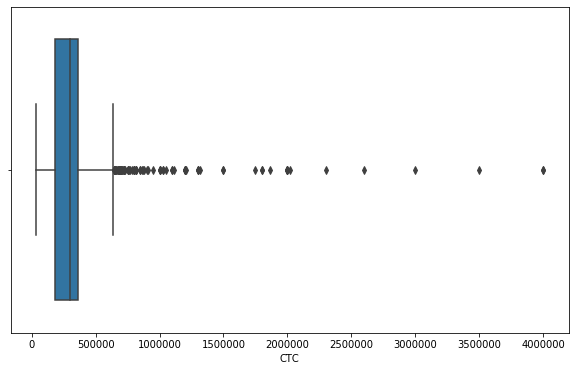

In [365]:
plt.figure(figsize=(10,6))
sns.boxplot(data1.CTC)

In [64]:
data_lowCTC_x

['CollegeCityTier',
 'CollegeTier',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience',
 'English',
 'Logical',
 'Quant',
 '10percentage',
 '12percentage',
 'collegeGPA',
 'GradYear',
 'Age',
 'updated_domain',
 'Branch_label']

In [65]:
rf_model_dp15=RandomForestRegressor(max_depth=15, max_features=5, n_estimators=200, n_jobs=-1,random_state=1)

In [68]:
y_train=data_midCTC.CTC

In [69]:
x_train=data_midCTC[data_lowCTC_x]

In [73]:
x_test=data_test[data_lowCTC_x]

In [74]:
rf_model_dp15.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, max_features=5, n_estimators=200, n_jobs=-1,
                      random_state=1)

In [75]:
# Performance metrics
grid_best= rf_model_dp15.predict(x_train)
errors = abs(grid_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')
print('Score',rf_model_dp15.score(x_train, y_train))

The best model from grid-search has an accuracy of 80.3 %
Score 0.86357045396076


In [76]:
#RMSE
grid_mse = mean_squared_error(y_train, grid_best)
grid_rmse = np.sqrt(grid_mse)
print('The best model from the grid search has a RMSE of', round(grid_rmse, 2))

The best model from the grid search has a RMSE of 51534.29
